<a href="https://colab.research.google.com/github/Dennis-224/Data_cleaning/blob/main/Copy_of_Data_cleaning_with_pandas_numpy_and_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#We now load our csv dataset file


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving House_Price - House_Price.csv to House_Price - House_Price.csv
User uploaded file "House_Price - House_Price.csv" with length 54771 bytes


In [ ]:
import pandas as pd
import io

# Get the first filename from the uploaded dictionary
uploaded_filename = next(iter(uploaded))

# Read the uploaded CSV file into a pandas DataFrame
df = pd.read_csv(io.StringIO(uploaded[uploaded_filename].decode('utf-8')))
print("Shape", df.shape)

Shape (506, 19)


# We now do a snapy EDD


In [ ]:
print(df.describe(include= 'all'))
df.info()
df.head()

             price  crime_rate  resid_area    air_qual    room_num  \
count   506.000000  506.000000  506.000000  506.000000  506.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean     22.528854    3.613524   41.136779    0.554695    6.284634   
std       9.182176    8.601545    6.860353    0.115878    0.702617   
min       5.000000    0.006320   30.460000    0.385000    3.561000   
25%      17.025000    0.082045   35.190000    0.449000    5.885500   
50%      21.200000    0.256510   39.690000    0.538000    6.208500   
75%      25.000000    3.677083   48.100000    0.624000    6.623500   
max      50.000000   88.976200   57.740000    0.871000    8.780000   

               age       dist1       dist2       dist3       dist4  \
count   506.000000  506.000000  506.000000  506.000000  506.000000   
unique         NaN 

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,NaN,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


#Time to detect outliers


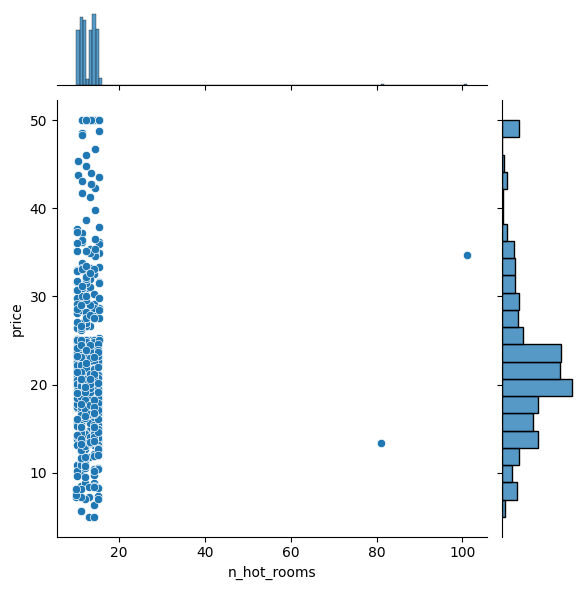

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
sns.jointplot(x='n_hot_rooms', y='price', data=df)
plt.show()

#In like manner for multiple columns...


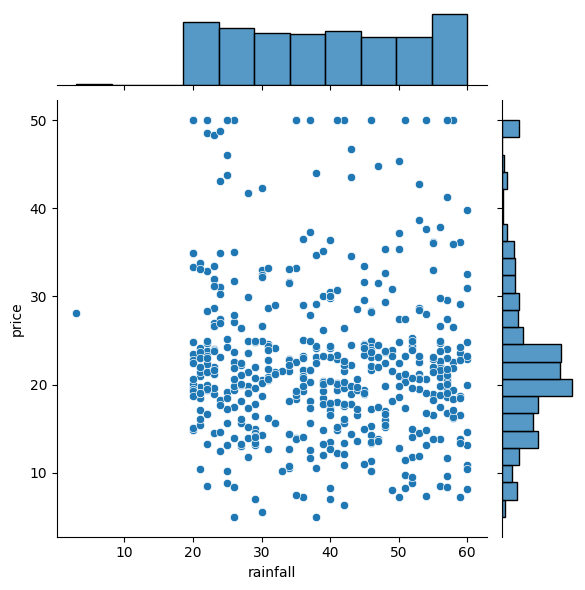

In [ ]:
for col in ['rainfall']: # replace or extend with other numeric cols
    sns.jointplot(x=col, y='price', data=df)
    plt.show()

#Categorical inspection and visualization


Unique values in airport column: ['YES' 'NO']


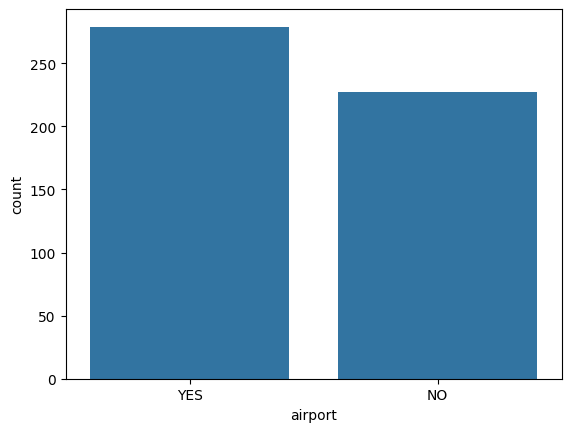

In [ ]:
print("Unique values in airport column:", df['airport'].unique())
sns.countplot(x='airport', data=df)
plt.show()

#General approach for categorical columns



Column: airport -- unique values: ['YES' 'NO']


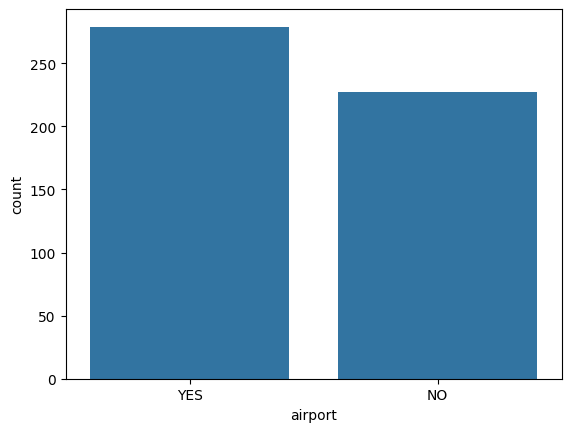

Column: waterbody -- unique values: ['River' 'Lake' nan 'Lake and River']


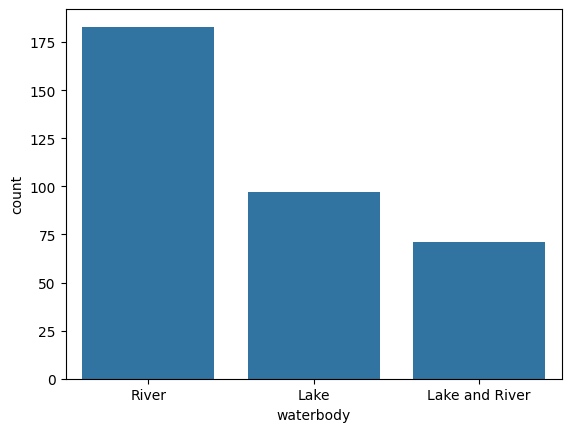

Column: bus_ter -- unique values: ['YES']


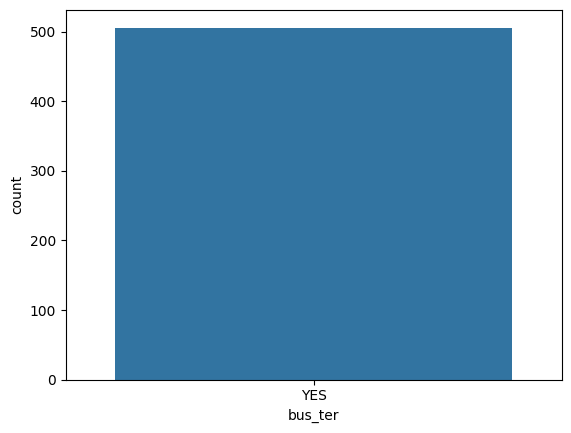

In [ ]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
    print(f"Column: {col} -- unique values: {df[col].unique()}")
    sns.countplot(x=col, data=df)
    plt.show()

#Time to takle missing values
#After cleaning we print the data again to confirm


In [ ]:
df['waterbody'] = df['waterbody'].fillna(df['waterbody'].mode()[0])
df['n_hos_beds'] = df['n_hos_beds'].fillna(df['n_hos_beds'].mode()[0])
print(df.describe(include= 'all'))
df.info()
df.head()

             price  crime_rate  resid_area    air_qual    room_num  \
count   506.000000  506.000000  506.000000  506.000000  506.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean     22.528854    3.613524   41.136779    0.554695    6.284634   
std       9.182176    8.601545    6.860353    0.115878    0.702617   
min       5.000000    0.006320   30.460000    0.385000    3.561000   
25%      17.025000    0.082045   35.190000    0.449000    5.885500   
50%      21.200000    0.256510   39.690000    0.538000    6.208500   
75%      25.000000    3.677083   48.100000    0.624000    6.623500   
max      50.000000   88.976200   57.740000    0.871000    8.780000   

               age       dist1       dist2       dist3       dist4  \
count   506.000000  506.000000  506.000000  506.000000  506.000000   
unique         NaN 

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,River,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


We continue with dealing with outliers




**Capping**: Based on the visualizations, it appears that the outliers are on the higher end of the n_hot_rooms values. In this case, capping would be the appropriate method to handle these outliers. Capping involves setting a maximum value for the outliers, effectively replacing them with this upper limit. In layman terms when data is at higher side, you bring down to lower range


In [ ]:
np.percentile(df.n_hot_rooms,[99]) #we do the 99th percentile for capping

array([15.39952])

In [ ]:
uv = np.percentile(df.n_hot_rooms,[99])[0] #we want it to start from the very first column value

In [ ]:
df[(df.n_hot_rooms>uv)]
df.n_hot_rooms[(df.n_hot_rooms> 3*uv)] = 3*uv

/tmp/ipython-input-4263027841.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.n_hot_rooms[(df.n_hot_rooms> 3*uv)] = 3*uv
/tmp/ipython-input-4263027841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

So we check that its been effected...


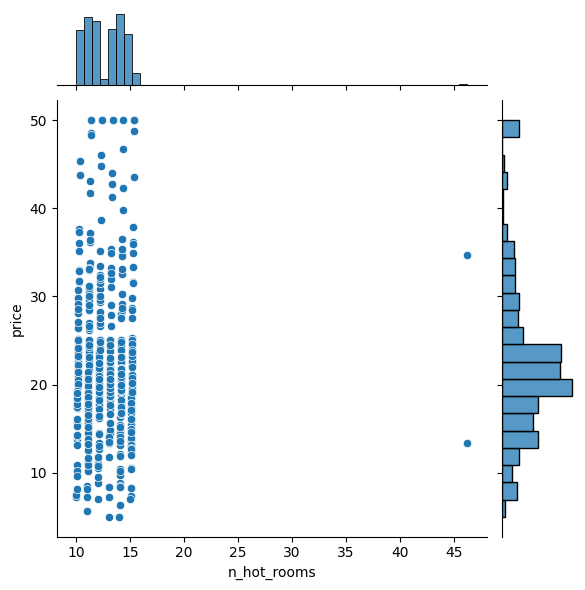

In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
sns.jointplot(x='n_hot_rooms', y='price', data=df)
plt.show() #Before the outliers was around 80 but now it comes down to 46

**Flooring** is a technique used in data preprocessing to handle outliers that are significantly lower than the majority of the data. Similar to capping, which sets an upper limit for outliers, flooring sets a lower limit.

Essentially, any data point below a certain calculated minimum value (often a percentile like the 1st percentile) is replaced with that minimum value. This helps to reduce the impact of extremely low values on your analysis or model

Flooring is like an opposite to capping


In [ ]:
np.percentile(df.rainfall,[1])[0]

np.float64(20.0)

In [ ]:
np.percentile(df.rainfall,[1])[0]
lv = np.percentile(df.rainfall,[1])[0]
df.rainfall[(df.rainfall< 0.3*lv)] = 0.3*lv

/tmp/ipython-input-1444621087.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.rainfall[(df.rainfall< 0.3*lv)] = 0.3*lv
/tmp/ipython-input-1444621087.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

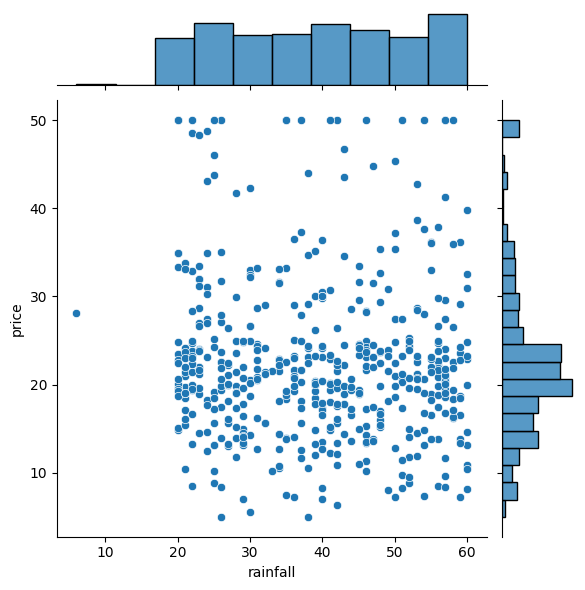

In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
sns.jointplot(x='rainfall', y='price', data=df)
plt.show()

**Seasonality** can affect our data
Lets ask AI how that could happen here...

**Rainfall**: This column directly relates to weather patterns, which are seasonal. High rainfall seasons could correlate with certain property conditions or impact outdoor amenities like parks.
**Waterbody** **levels**: If the "waterbody" column relates to natural water sources, their levels could fluctuate seasonally due to rainfall and evaporation, potentially influencing the desirability or accessibility of properties near them.
**Parks**: The usage and appeal of parks could be seasonal, affecting nearby property values or interest.
**Air** **quality**: Air quality can sometimes have seasonal variations depending on factors like temperature inversions, pollution sources, and wind patterns


**Non Usable Variable.**
* If a table has just one value thats non usable bacause it won't relate with anything. An example is Bus_ter that has only YES
* if we get an initail data having low fill rate (i.e 60% data is missing), then we drop the entire data.
* Imagine we have a variable telling us make of cars. It can't help us in predicting house price so we delete such variable



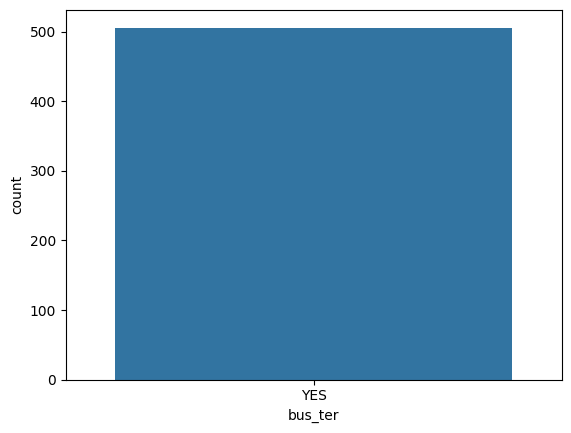

In [ ]:
df.bus_ter.unique().tolist()
sns.countplot(x=df.bus_ter)
df = df.drop('bus_ter', axis=1) #Now  after this when we check for bus_ter variable we'll get an error message

In [ ]:
df.buster

AttributeError: 'DataFrame' object has no attribute 'buster'

**Bivariate Analysis according to AI**
Bivariate analysis is a statistical method used to explore the relationship between two variables. This can involve looking at how changes in one variable are associated with changes in the other, and the strength and direction of that association. Common techniques for bivariate analysis include:
* Scatter plots: To visualize the relationship between two numerical variables.
* Correlation coefficients: To quantify the strength and direction of the linear relationship between two numerical variables.
* Cross-tabulation and chi-square tests: To examine the relationship between two categorical variables.
* Box plots or violin plots: To compare the distribution of a numerical variable across different categories of a categorical variable.

It helps in understanding how variables interact with each other, which is crucial for identifying patterns, making predictions, and building models.

**Histogram.** Now when we plot a histogram we get to see how skewed our data is.
A positively skewed data has the top of the bell on the left hand side. if the top of the bell is on the right hand side, then its negatively skewed.


/tmp/ipython-input-1143646034.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x= df.price, hist=True, kde=True)


<Axes: ylabel='Density'>

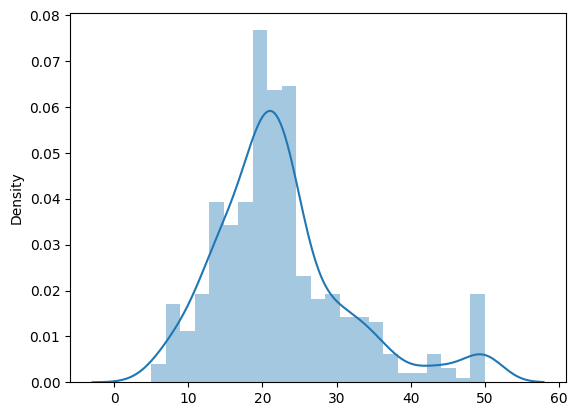

In [ ]:
sns.distplot(x= df.price, hist=True, kde=True)

**Logarithm or Square root** according to AI
Logarithm and square root transformations are often used in data preprocessing, particularly when dealing with skewed data or when preparing data for certain statistical models that assume normality.

In this context (according to AI), where you have already looked at the distribution of the price variable using a histogram (which showed some skewness), here are some potential places where you might consider using logarithm or square root transformations:
**Handling Skewed Variables**: If any of the numerical features (like crime_rate, resid_area, air_qual, age, poor_prop, or even price itself if you plan to model it) are highly skewed, applying a logarithm or square root transformation can help make their distributions more symmetrical and closer to a normal distribution. This can be beneficial for some regression models.
**Stabilizing Variance:** For some variables, the variance might not be constant across the range of values. Transformations can sometimes help stabilize the variance, which is another assumption of certain statistical models.
**Before Modeling:** When you move towards building a predictive model (like linear regression) to predict house prices, transforming skewed independent variables can improve the performance and interpretability of the model.

To determine if a transformation is needed and which one to use, you would typically:

Visualize the distribution of the variable (using histograms or density plots) to check for skewness.
Consider the relationship between the independent variables and the dependent variable (price). Transformations might help linearize non-linear relationships.

You could apply these transformations using functions like np.log() or np.sqrt() from NumPy to the relevant columns in your DataFrame.



<Axes: xlabel='crime_rate', ylabel='price'>

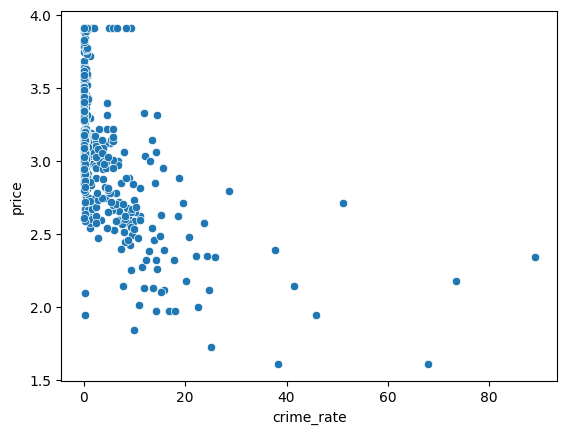

In [ ]:
sns.scatterplot(x=df.crime_rate, y=np.log(df.price))

In [ ]:
np.log(df.crime_rate).describe() #The issue with logarithm is that it can lead to negative values. And imagine having a negative value for crime rate. Its not feasible!

,crime_rate
count,506.000000
mean,-0.780436
std,2.162050
min,-5.064036
25%,-2.500488
50%,-1.360641
75%,1.302119
max,4.488369


In [ ]:
np.log(1+ df.crime_rate).describe() #we rectify it by adding +1 to our code

,crime_rate
count,506.000000
mean,0.813418
std,1.022731
min,0.006300
25%,0.078853
50%,0.228336
75%,1.542674
max,4.499545


In [ ]:
# but square root doesn't need plus 1
np.sqrt(df.crime_rate).describe()

,crime_rate
count,506.000000
mean,1.229439
std,1.451263
min,0.079498
25%,0.286435
50%,0.506461
75%,1.917572
max,9.432720


Now we finish it up


/tmp/ipython-input-961623738.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df.crime_rate, hist = True, kde = True)


<Axes: ylabel='Density'>

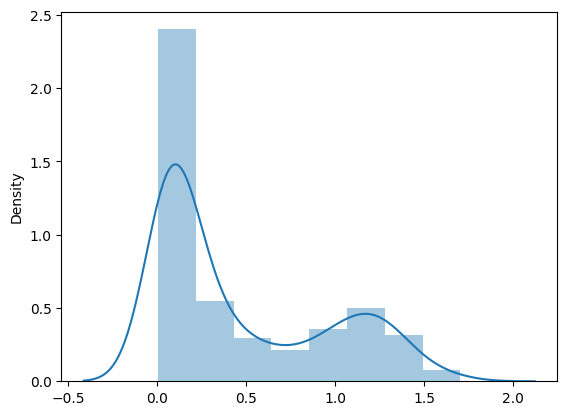

In [ ]:
df.crime_rate = np.log(1+ df.crime_rate)
sns.distplot(x=df.crime_rate, hist = True, kde = True)